In [1]:
import pandas as pd

import numpy as np

In [2]:
italy = pd.read_csv('data\Italy gas consumption.csv', index_col=0, parse_dates=True)

In [3]:
italy

,Consumption,Mean temperature
Date,,
2016-01-01,233.59,5.86
2016-01-02,250.99,6.87
2016-01-03,242.07,7.13
2016-01-04,286.05,7.28
2016-01-05,284.71,8.22
...,...,...
2020-12-27,239.09,4.24
2020-12-28,278.86,6.93
2020-12-29,279.21,7.73


<Axes: xlabel='Date'>

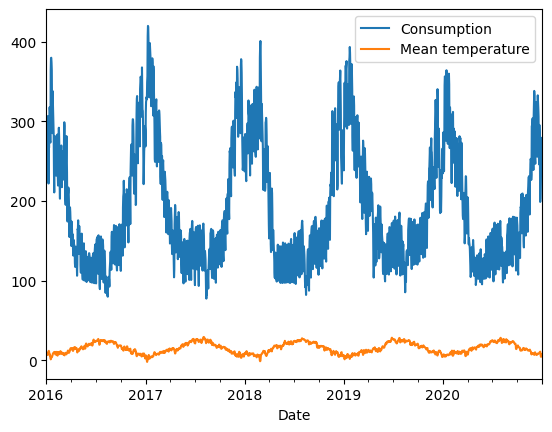

In [4]:
italy.plot()

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [6]:
model = SARIMAX(italy['Consumption'].values,
                exog=italy['Mean temperature'].values,
                order=(1, 1, 0), 
                seasonal_order=(1, 1, 1, 7)).fit()

In [7]:
forecast_temperature = pd.DataFrame(italy['Mean temperature'].groupby([italy.index.month, italy.index.day]).mean())
forecast_temperature

Mean temperature
Date Date                  
1    1                5.990
     2                6.248
     3                6.088
     4                5.708
     5                6.396
...                     ...
12   27               6.568
     28               6.360
     29               5.486
     30               5.394
     31               5.382

[366 rows x 1 columns]

In [8]:
forecast_temperature.drop(index=(2, 29), inplace=True)

In [9]:
forecast_temperature[40:61]

Mean temperature
Date Date                  
2    10               8.292
     11               8.010
     12               7.210
     13               7.298
     14               7.792
     15               7.662
     16               8.294
     17               8.438
     18               8.300
     19               7.708
     20               7.324
     21               7.936
     22               8.640
     23               8.654
     24               8.764
     25               7.848
     26               7.326
     27               6.992
     28               7.826
3    1                8.564
     2                9.320

In [10]:
index = pd.date_range('2021-01-01','2021-12-31', freq='D')
data = forecast_temperature['Mean temperature'].values
forecast = pd.DataFrame(data=data, index=index)
forecast.columns = ['Mean temperature']

In [11]:
forecast

,Mean temperature
2021-01-01,5.990
2021-01-02,6.248
2021-01-03,6.088
2021-01-04,5.708
2021-01-05,6.396
...,...
2021-12-27,6.568
2021-12-28,6.360
2021-12-29,5.486
2021-12-30,5.394


In [12]:
italy_forctemp=pd.concat([italy, forecast])

In [13]:
italy_forctemp

,Consumption,Mean temperature
2016-01-01,233.59,5.860
2016-01-02,250.99,6.870
2016-01-03,242.07,7.130
2016-01-04,286.05,7.280
2016-01-05,284.71,8.220
...,...,...
2021-12-27,NaN,6.568
2021-12-28,NaN,6.360
2021-12-29,NaN,5.486
2021-12-30,NaN,5.394


In [14]:
import matplotlib.pyplot as plt

<Axes: >

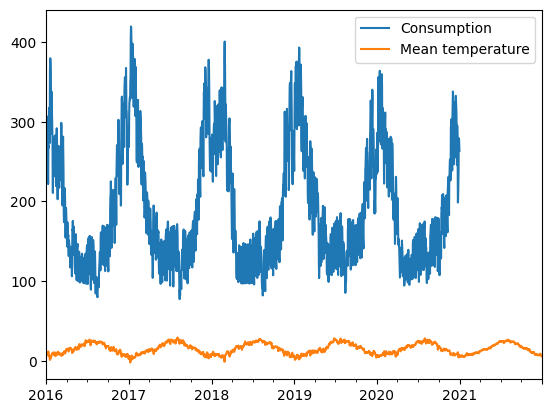

In [15]:
italy_forctemp.plot()

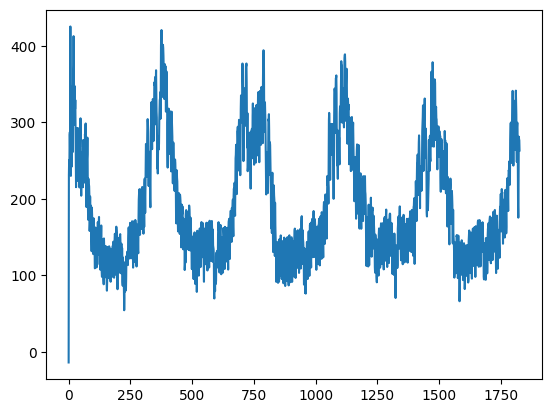

In [16]:
plt.plot(model.fittedvalues)

In [17]:
model = SARIMAX(italy_forctemp['Consumption'],
                exog=italy_forctemp['Mean temperature'],
                order=(1, 1, 0), 
                seasonal_order=(1, 1, 1, 7)).fit()

C:\Users\Valeria\.virtualenvs\analysis_and_forecasting-SQK1gn6O\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Valeria\.virtualenvs\analysis_and_forecasting-SQK1gn6O\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [18]:
start = italy.index[-1] + pd.DateOffset(days=1)
end = italy_forctemp.index[-1]
start, end

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [19]:
forecast_consuption = model.predict(start=start, end=end)

<Axes: >

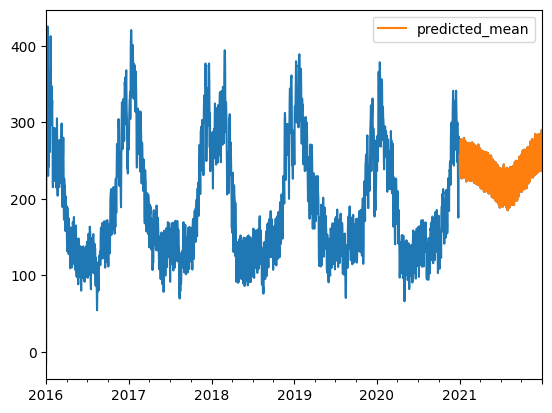

In [22]:
#italy_forctemp.plot()
model.fittedvalues.plot()
forecast_consuption.plot(legend=True)

Сначала построим модель линейной регрессии

In [501]:
import statsmodels.api as sm

In [502]:
linregr = sm.GLM(italy['Consumption'], 
                 italy['Mean temperature'], 
                 family=sm.families.Gaussian()).fit() # что и по чему прогнозируем

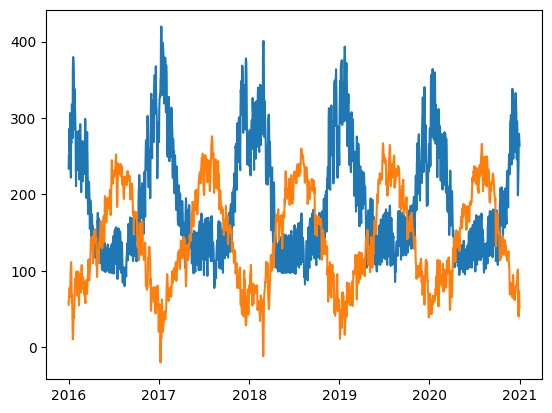

In [503]:
plt.plot(italy['Consumption'])
plt.plot(linregr.fittedvalues)
plt.show()

In [504]:
italy['const'] = 1

In [505]:
italy

,Consumption,Mean temperature,const
Date,,,
2016-01-01,233.59,5.86,1
2016-01-02,250.99,6.87,1
2016-01-03,242.07,7.13,1
2016-01-04,286.05,7.28,1
2016-01-05,284.71,8.22,1
...,...,...,...
2020-12-27,239.09,4.24,1
2020-12-28,278.86,6.93,1
2020-12-29,279.21,7.73,1


In [506]:
linregr = sm.GLM(italy['Consumption'].values, 
                 italy[['Mean temperature', 'const']].values, 
                 family=sm.families.Gaussian()).fit() # что и по чему прогнозируем

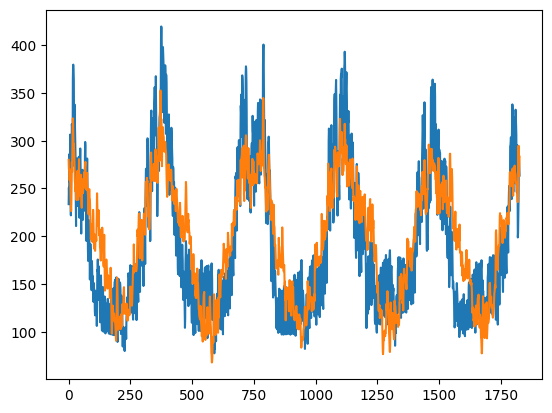

In [507]:
plt.plot(italy['Consumption'].values)
plt.plot(linregr.fittedvalues)
plt.show()

<AxesSubplot: xlabel='Date'>

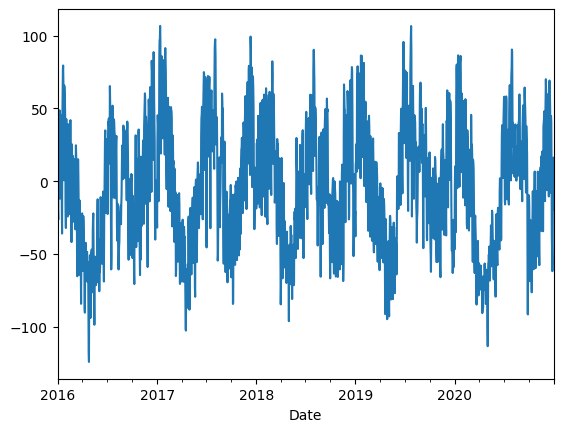

In [508]:
resids = (italy['Consumption']-linregr.fittedvalues)
resids.plot()

In [509]:
model_resid = SARIMAX(resids,
                    order=(1, 1, 0), 
                    seasonal_order=(1, 1, 1, 7)).fit()

c:\users\valeria\pycharmprojects\analysis_and_forecasting\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\valeria\pycharmprojects\analysis_and_forecasting\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


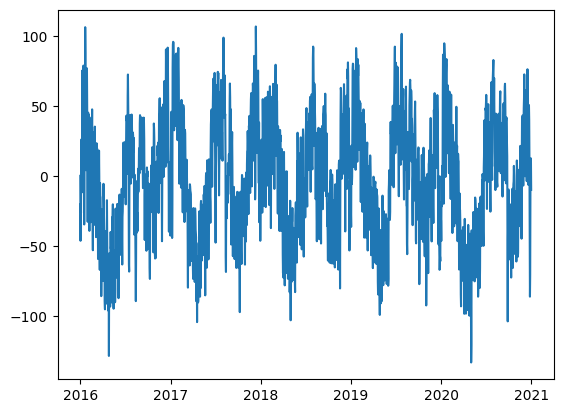

In [510]:
plt.plot(model_resid.fittedvalues)

In [511]:
forecast['const'] = 1

In [512]:
forecast

,Mean temperature,const
2021-01-01,5.990,1
2021-01-02,6.248,1
2021-01-03,6.088,1
2021-01-04,5.708,1
2021-01-05,6.396,1
...,...,...
2021-12-27,6.568,1
2021-12-28,6.360,1
2021-12-29,5.486,1
2021-12-30,5.394,1


In [513]:
forecast_temp = linregr.predict(forecast[['Mean temperature', 'const']])

<AxesSubplot: >

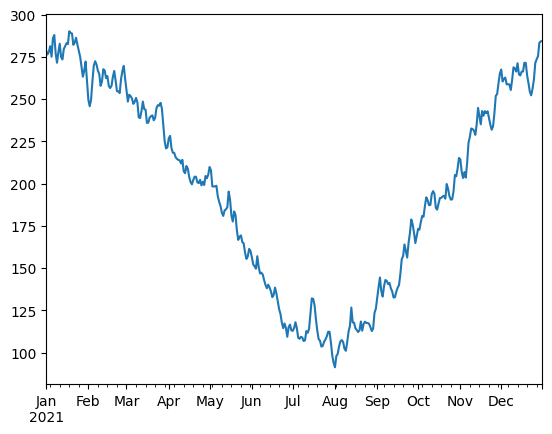

In [514]:
forecast_temp.plot()

<AxesSubplot: >

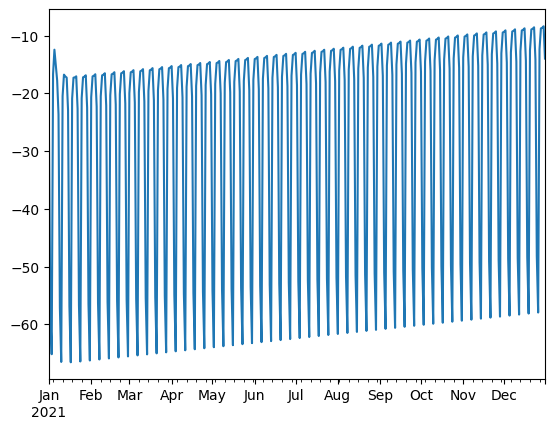

In [515]:
forecast_resids = model_resid.forecast(365)
forecast_resids.plot()

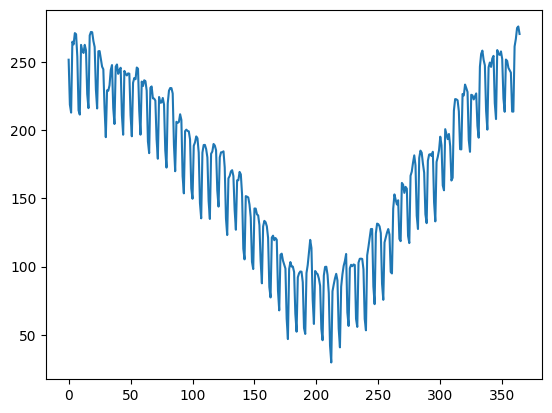

In [516]:
plt.plot(forecast_temp.values+forecast_resids.values)

In [517]:
forecast_cons = pd.DataFrame(forecast_temp+forecast_resids)
forecast_cons.columns = ['Consumption']

<AxesSubplot: xlabel='Date'>

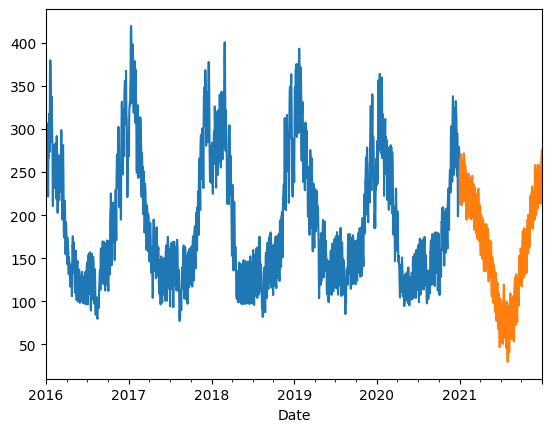

In [518]:
italy['Consumption'].plot()
forecast_cons['Consumption'].plot()

In [519]:
mindata = pd.DataFrame(italy['Mean temperature'].groupby([italy.index.month, italy.index.day]).min())
mindata.drop(index=(2, 29), inplace=True)

In [520]:
index = pd.date_range('2021-01-01','2021-12-31', freq='D')
forecast_min = pd.DataFrame(data=mindata['Mean temperature'].values, index=index)
forecast_min.columns = ['Min temperature']
forecast_min['const'] = 1

In [521]:
forecast_temp_min = linregr.predict(forecast_min[['Min temperature', 'const']])

<AxesSubplot: >

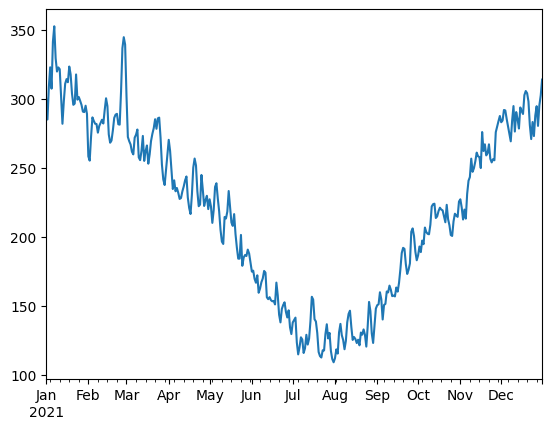

In [522]:
forecast_temp_min.plot()

In [523]:
forecast_cons_min = pd.DataFrame(forecast_temp_min+forecast_resids)
forecast_cons_min.columns = ['Consumption']

<AxesSubplot: xlabel='Date'>

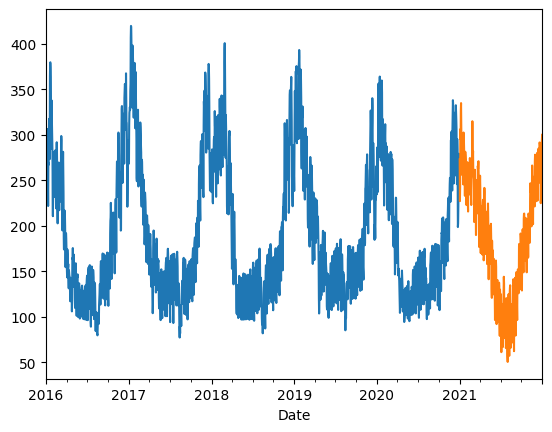

In [524]:
italy['Consumption'].plot()
forecast_cons_min['Consumption'].plot()

In [525]:
maxdata = pd.DataFrame(italy['Mean temperature'].groupby([italy.index.month, italy.index.day]).max())
maxdata.drop(index=(2, 29), inplace=True)

In [526]:
index = pd.date_range('2021-01-01','2021-12-31', freq='D')
forecast_max = pd.DataFrame(data=maxdata['Mean temperature'].values, index=index)
forecast_max.columns = ['Max temperature']
forecast_max['const'] = 1

In [527]:
forecast_temp_max = linregr.predict(forecast_max[['Max temperature', 'const']])

<AxesSubplot: >

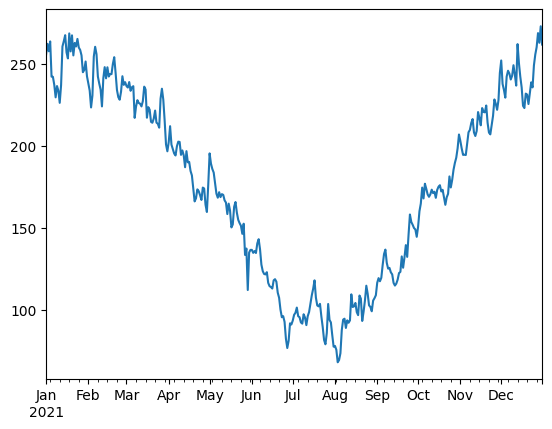

In [528]:
forecast_temp_max.plot()

In [529]:
forecast_cons_max = pd.DataFrame(forecast_temp_max+forecast_resids)
forecast_cons_max.columns = ['Consumption']

<AxesSubplot: xlabel='Date'>

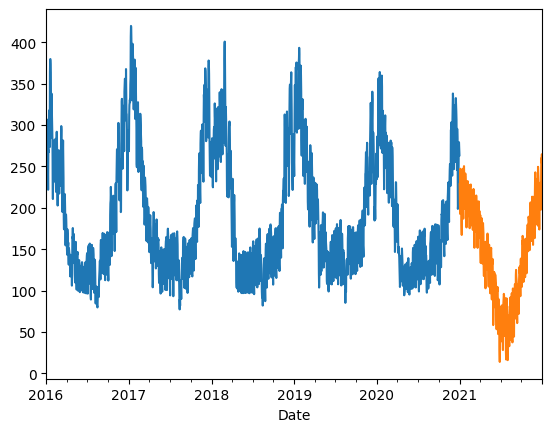

In [530]:
italy['Consumption'].plot()
forecast_cons_max['Consumption'].plot()

<AxesSubplot: xlabel='Date'>

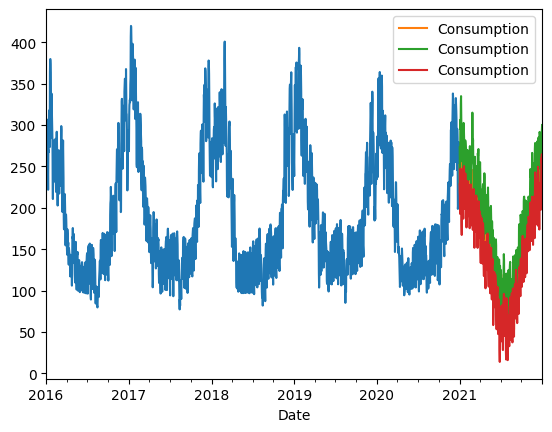

In [531]:
italy['Consumption'].plot()
forecast_cons['Consumption'].plot(legend=True)
forecast_cons_min['Consumption'].plot(legend=True)
forecast_cons_max['Consumption'].plot(legend=True)

In [532]:
for_approximation = italy.loc['2016-01-01':'2019-12-31']
for_approximation['day_of_week'] = for_approximation.index.dayofweek

C:\Users\Valeria\AppData\Local\Temp\ipykernel_4752\3101925214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_approximation['day_of_week'] = for_approximation.index.dayofweek


In [533]:
for_approximation = pd.get_dummies(for_approximation, columns=['day_of_week'])
for_approximation.columns = ['Consumption', 'Mean temperature', 'const', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

In [534]:
for_approximation

,Consumption,Mean temperature,const,monday,tuesday,wednesday,thursday,friday,saturday,sunday
Date,,,,,,,,,,
2016-01-01,233.59,5.86,1,0,0,0,0,1,0,0
2016-01-02,250.99,6.87,1,0,0,0,0,0,1,0
2016-01-03,242.07,7.13,1,0,0,0,0,0,0,1
2016-01-04,286.05,7.28,1,1,0,0,0,0,0,0
2016-01-05,284.71,8.22,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,239.08,7.44,1,0,0,0,0,1,0,0
2019-12-28,229.04,5.81,1,0,0,0,0,0,1,0
2019-12-29,236.41,4.16,1,0,0,0,0,0,0,1


In [535]:
linregr_fict = sm.GLM(for_approximation['Consumption'].values, 
                 for_approximation[['Mean temperature', 'const', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].values, 
                 family=sm.families.Gaussian()).fit() # что и по чему прогнозируем

In [536]:
mean_temperature = pd.DataFrame(for_approximation['Mean temperature'].groupby([for_approximation.index.month, for_approximation.index.day]).mean())
mean_temperature

Mean temperature
Date Date                  
1    1               6.0675
     2               6.4000
     3               6.0350
     4               5.2875
     5               6.3200
...                     ...
12   27              7.1500
     28              6.2175
     29              4.9250
     30              5.1025
     31              5.3525

[366 rows x 1 columns]

In [537]:
index = pd.date_range('2020-01-01','2020-12-31', freq='D')
data = mean_temperature['Mean temperature'].values
forecast_w = pd.DataFrame(data=data, index=index)
forecast_w.columns = ['Mean temperature']

In [538]:
forecast_w['const'] = 1

In [539]:
forecast_w['day_of_week'] = forecast_w.index.dayofweek
day_dummies = pd.get_dummies(forecast_w, columns=['day_of_week'])

In [540]:
day_dummies.columns = ['Mean temperature', 'const', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
day_dummies

,Mean temperature,const,monday,tuesday,wednesday,thursday,friday,saturday,sunday
2020-01-01,6.0675,1,0,0,1,0,0,0,0
2020-01-02,6.4000,1,0,0,0,1,0,0,0
2020-01-03,6.0350,1,0,0,0,0,1,0,0
2020-01-04,5.2875,1,0,0,0,0,0,1,0
2020-01-05,6.3200,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2020-12-27,7.1500,1,0,0,0,0,0,0,1
2020-12-28,6.2175,1,1,0,0,0,0,0,0
2020-12-29,4.9250,1,0,1,0,0,0,0,0
2020-12-30,5.1025,1,0,0,1,0,0,0,0


In [541]:
forecast_fict = linregr_fict.predict(day_dummies[['Mean temperature', 'const', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']])

<AxesSubplot: xlabel='Date'>

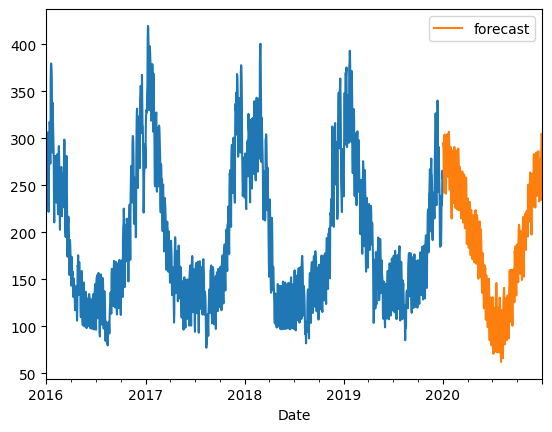

In [542]:
for_approximation['Consumption'].plot()
forecast_fict.rename('forecast').plot(legend=True)

In [554]:
def mse(arr1, arr2):
    res = 0
    for i in range(forecast_fict.shape[0]):
        res += (arr1[i]-arr2[i])**2
    return res/forecast_fict.shape[0]

In [555]:
mse(italy.loc['2020-01-01':'2020-12-31']['Consumption'].values, forecast_fict.values)

1716.4738788632874

In [557]:
mse(italy.loc['2020-01-01':'2020-12-31']['Consumption'].values, linregr.fittedvalues[-366:])

2082.847981164647